cats and dogs - MobileNet 버전

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import Xception, ResNet50, InceptionV3, MobileNet
from tensorflow.keras.layers import Flatten, Dense, Dropout, GlobalAveragePooling2D

In [3]:
# 파일 다운로드

!wget https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

--2021-10-07 16:54:19--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.195.128, 173.194.197.128, 64.233.191.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.195.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M   169MB/s    in 0.4s    

2021-10-07 16:54:20 (169 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [4]:
import os
import shutil

if os.path.exists('/content/cats_and_dogs_filtered/'):    # 작업 디렉토리는 cats_and_dogs_filtered
    
    shutil.rmtree('/content/cats_and_dogs_filtered/')
    print('/content/cats_and_dogs_filtered/  is removed !!!')

In [5]:
# 압축파일 풀기

import zipfile

with zipfile.ZipFile('/content/cats_and_dogs_filtered.zip', 'r') as target_file:

    target_file.extractall('/content/cats_and_dogs_filtered/') 

In [6]:
# 데이터 전체 개수 확인

import os
import glob

# 데이터 정답 (label) 개수 및 종류 확인

cats_train_list = os.listdir('/content/cats_and_dogs_filtered/cats_and_dogs_filtered/train/cats')
dogs_train_list = os.listdir('/content/cats_and_dogs_filtered/cats_and_dogs_filtered/train/dogs')

cats_validation_list = os.listdir('/content/cats_and_dogs_filtered/cats_and_dogs_filtered/validation/cats')
dogs_validation_list = os.listdir('/content/cats_and_dogs_filtered/cats_and_dogs_filtered/validation/dogs')

print('cats train file nums = ', len(cats_train_list))
print('dogs train file nums = ', len(dogs_train_list))
print('cats validation file nums = ', len(cats_validation_list))
print('dogs validation file nums = ', len(cats_validation_list))
print('=================================================')

cats train file nums =  1000
dogs train file nums =  1000
cats validation file nums =  500
dogs validation file nums =  500


train 디렉토리에서 image data 읽어서 x_train, y_train 생성

In [7]:
import os
import cv2
import glob
import numpy as np
from datetime import datetime

image_list = []
label_list = []

train_base_dir = '/content/cats_and_dogs_filtered/cats_and_dogs_filtered/train/'

train_label_list = os.listdir(train_base_dir)    # 정답이름

print('train label # => ', len(train_label_list))

start_time = datetime.now()

for train_label_name in train_label_list:

    # cats => 0.0,  dogs => 1.0 변환
    if train_label_name == 'cats':
        label_num = 0.0
    elif train_label_name == 'dogs':
        label_num = 1.0

    # 이미지 파일 읽어오기

    file_path = train_base_dir + train_label_name

    train_img_file_list = glob.glob(file_path+'/*.jpg')

    # 각각의 정답 디렉토리에 있는 이미지 파일, 즉 .jpg 파일 읽어서 리스트에 저장
    
    for train_img_file in train_img_file_list:

        train_img = cv2.imread(train_img_file, cv2.IMREAD_COLOR) 

        train_img = cv2.resize(train_img, dsize=(224,224))    # (224,224) 변환

        train_img = cv2.cvtColor(train_img, cv2.COLOR_BGR2RGB)

        image_list.append(train_img)
        label_list.append(label_num) 

# numpy 변환

x_train = np.array(image_list).astype('float32')
y_train = np.array(label_list).astype('float32')

print('x_train.shape = ', x_train.shape, ', y_train.shape = ', y_train.shape)

end_time = datetime.now()

print('train data generation time => ', end_time-start_time)

train label # =>  2
x_train.shape =  (2000, 224, 224, 3) , y_train.shape =  (2000,)
train data generation time =>  0:00:06.098774


validation 디렉토리로부터 이미지 읽어서 x_val, y_val 생성

In [8]:
import os
import cv2
import glob
import numpy as np
from datetime import datetime

image_list = []
label_list = []

validation_base_dir = '/content/cats_and_dogs_filtered/cats_and_dogs_filtered/validation/'

validation_label_list = os.listdir(validation_base_dir)    # 정답이름

print('validation label # => ', len(validation_label_list))

start_time = datetime.now()

for validation_label_name in validation_label_list:

    # cats => 0.0,  dogs => 1.0 변환
    if validation_label_name == 'cats':
        label_num = 0.0
    elif validation_label_name == 'dogs':
        label_num = 1.0

    # 이미지 파일 읽어오기

    file_path = validation_base_dir + validation_label_name

    validation_img_file_list = glob.glob(file_path+'/*.jpg')

    # 각각의 정답 디렉토리에 있는 이미지 파일, 즉 .jpg 파일 읽어서 리스트에 저장
    
    for validation_img_file in validation_img_file_list:

        validation_img = cv2.imread(validation_img_file, cv2.IMREAD_COLOR) 

        validation_img = cv2.resize(validation_img, dsize=(224,224))    # (224,224) 변환

        validation_img = cv2.cvtColor(validation_img, cv2.COLOR_BGR2RGB)

        image_list.append(validation_img)
        label_list.append(label_num)

# numpy 변환

x_val = np.array(image_list).astype('float32')
y_val = np.array(label_list).astype('float32')

print('x_val.shape = ', x_val.shape, ', y_val.shape = ', y_val.shape)

end_time = datetime.now()

print('validation data generation time => ', end_time-start_time)

validation label # =>  2
x_val.shape =  (1000, 224, 224, 3) , y_val.shape =  (1000,)
validation data generation time =>  0:00:02.986576


validation data 로 부터 test data 분리 (분리 비율 5 : 5)

In [9]:
import numpy as np

# validation data random shuffle

s = np.arange(len(x_val))

# index random shuffle

np.random.shuffle(s)

# x_val, y_val 재 생성

x_val = x_val[s]
y_val = y_val[s]

# validation, test data 분리
ratio = 0.5

split_num = int(ratio*len(x_val))

print('split num => ', split_num)

x_test = x_val[0:split_num]
y_test = y_val[0:split_num]

x_val = x_val[split_num:]
y_val = y_val[split_num:]

print('x_val.shape = ', x_val.shape, ', y_val.shape = ', y_val.shape)
print('x_test.shape = ', x_test.shape, ', y_test.shape = ', y_test.shape)

split num =>  500
x_val.shape =  (500, 224, 224, 3) , y_val.shape =  (500,)
x_test.shape =  (500, 224, 224, 3) , y_test.shape =  (500,)


이미지 데이터 정규화

In [10]:
x_train = x_train / 255.0
x_val = x_val / 255.0
x_test = x_test / 255.0

전이학습을 위한 ResNet50 모델 구축

In [37]:
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224,224,3))

base_model.summary()

17235968/17225924 [==============================] - 0s 0us/step
Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________

In [38]:
model = Sequential()

model.add(base_model)

model.add(Flatten())  # GlobalAveragePooling2D() 해도 무방함

model.add(Dense(16, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(2, activation='softmax'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_224 (Function (None, 7, 7, 1024)        3228864   
_________________________________________________________________
flatten_4 (Flatten)          (None, 50176)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 16)                802832    
_________________________________________________________________
dropout_4 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 34        
Total params: 4,031,730
Trainable params: 4,009,842
Non-trainable params: 21,888
_________________________________________________________________


In [39]:
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer=tf.keras.optimizers.Adam(2e-5), metrics=['acc'])

In [40]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from datetime import datetime

save_file_name = './cats_and_dogs_Xception_Colab.h5'

checkpoint = ModelCheckpoint(save_file_name,             # file명을 지정합니다
                             monitor='val_loss',   # val_loss 값이 개선되었을때 호출됩니다
                             verbose=1,            # 로그를 출력합니다
                             save_best_only=True,  # 가장 best 값만 저장합니다
                             mode='auto'           # auto는 알아서 best를 찾습니다. min/max
                            )

earlystopping = EarlyStopping(monitor='val_loss',  # 모니터 기준 설정 (val loss) 
                              patience=5,         # 5회 Epoch동안 개선되지 않는다면 종료
                             )


start_time = datetime.now()

hist = model.fit(x_train, y_train,
                 epochs=10, batch_size=16,          # batch_size 는 시스템 메모리에 맞게 설정
                 validation_data=(x_val, y_val))

end_time = datetime.now()

print('Elapsed Time => ', end_time-start_time)

Epoch 1/10
125/125 [==============================] - 28s 189ms/step - loss: 0.3718 - acc: 0.8465 - val_loss: 0.1477 - val_acc: 0.9360
Epoch 2/10
125/125 [==============================] - 23s 181ms/step - loss: 0.1098 - acc: 0.9545 - val_loss: 0.0948 - val_acc: 0.9680
Epoch 3/10
125/125 [==============================] - 23s 182ms/step - loss: 0.0589 - acc: 0.9800 - val_loss: 0.0788 - val_acc: 0.9740
Epoch 4/10
125/125 [==============================] - 23s 181ms/step - loss: 0.0396 - acc: 0.9860 - val_loss: 0.0655 - val_acc: 0.9820
Epoch 5/10
125/125 [==============================] - 23s 182ms/step - loss: 0.0332 - acc: 0.9900 - val_loss: 0.0746 - val_acc: 0.9740
Epoch 6/10
125/125 [==============================] - 23s 182ms/step - loss: 0.0227 - acc: 0.9930 - val_loss: 0.0660 - val_acc: 0.9780
Epoch 7/10
125/125 [==============================] - 23s 183ms/step - loss: 0.0200 - acc: 0.9930 - val_loss: 0.0601 - val_acc: 0.9820
Epoch 8/10
125/125 [==============================] - 2

In [41]:
model.evaluate(x_test, y_test)

16/16 [==============================] - 2s 101ms/step - loss: 0.0553 - acc: 0.9780


[0.0552804209291935, 0.9779999852180481]

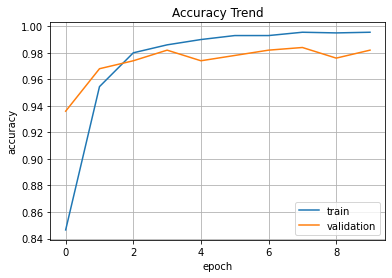

In [42]:
import matplotlib.pyplot as plt

plt.plot(hist.history['acc'], label='train')
plt.plot(hist.history['val_acc'], label='validation')
plt.title('Accuracy Trend')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.grid()
plt.show()

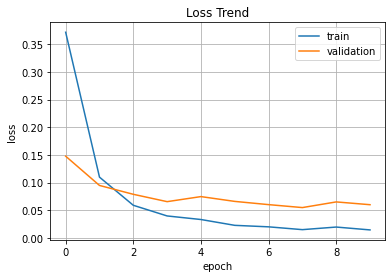

In [43]:
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='validation')
plt.title('Loss Trend')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.grid()
plt.show()